In [14]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from kneed import KneeLocator

In [ ]:
sys.path.append('/Users/lawhea1214/Documents/WGU/D603/task2/data')

In [16]:
df = pd.read_csv('data/medical_clean_2025-09-27_v1.csv')

In [17]:
df.head()

,CaseOrder,CustomerId,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,AdditionalCharges,TimelyAdmission,TimelyTreatment,TimelyVisits,Reliability,Options,HoursOfTreatment,CouretousStaff,ActiveListening
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [18]:
class SaveIt:
    date_it = date.today()
    def __init__(self, path, dataframe, filename='Xw_medical_clean', type='csv',version="v1"):
        self.path = path
        self.filename = filename
        self.type = type
        self.version = version
        self.dataframe = dataframe
        self.create_name = f"{self.filename}_{SaveIt.date_it}_{self.version}.{self.type}"
        self.join_path = os.path.join(self.path, self.create_name)

    def save_data(self):
        self.dataframe.to_csv(self.join_path, index=False)
    
    def load_data(self):
        return pd.read_csv(self.join_path)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaseOrder          10000 non-null  int64  
 1   CustomerId         10000 non-null  object 
 2   Interaction        10000 non-null  object 
 3   UID                10000 non-null  object 
 4   City               10000 non-null  object 
 5   State              10000 non-null  object 
 6   County             10000 non-null  object 
 7   Zip                10000 non-null  int64  
 8   Lat                10000 non-null  float64
 9   Lng                10000 non-null  float64
 10  Population         10000 non-null  int64  
 11  Area               10000 non-null  object 
 12  TimeZone           10000 non-null  object 
 13  Job                10000 non-null  object 
 14  Children           10000 non-null  int64  
 15  Age                10000 non-null  int64  
 16  Income             1000

In [20]:
df["Gender"].unique()

array(['Male', 'Female', 'Nonbinary'], dtype=object)

In [21]:
women = df[df["Gender"] == "Female"]

In [22]:
women['DocVisits'].info()

<class 'pandas.core.series.Series'>
Index: 5018 entries, 1 to 9999
Series name: DocVisits
Non-Null Count  Dtype
--------------  -----
5018 non-null   int64
dtypes: int64(1)
memory usage: 78.4 KB


In [23]:
Xw = women[["Children", "Age", "Income","DocVisits", "TotalCharge", "AdditionalCharges"]]

In [24]:
path = '/Users/lawhea1214/Documents/WGU/D603/task2/data'
filename = 'Xw_medical_clean'
test = SaveIt(path, Xw)
# test.save_data()

In [ ]:
#ex the dataframe
Xw.head()

,Children,Age,Income,DocVisits,TotalCharge,AdditionalCharges
1,3,51,46805.99,4,4193.190458,17612.998120
2,3,53,14370.14,4,2434.234222,17505.192460
4,1,22,1209.56,5,2113.073274,3716.525786
7,7,40,38319.29,7,3021.499039,6930.572138
9,2,78,38965.22,7,3147.855813,26225.989910


In [26]:
kmeans = KMeans(n_clusters=8, n_init=10, max_iter=100, random_state=123)
scaler = StandardScaler()
pipeline = make_pipeline(scaler, kmeans)
pipe = pipeline.fit(Xw)

In [27]:
#clusters from scaled piepline data
centroids = pipeline.named_steps['kmeans'].cluster_centers_
print("Centroids:")
print(centroids)
#labels from fitted k-means pipline
labels = pipeline.named_steps['kmeans'].labels_
print("Labels")
print(labels)

Centroids:
[[-0.21420994  0.60643291 -0.24044221 -0.68753249  1.00191288  0.25955005]
 [-0.13510384 -0.11389542  2.26821974  0.04100071 -0.20573935 -0.20930501]
 [-0.20766034  0.49384597 -0.27702779 -0.66251123 -0.94522029  0.1966271 ]
 [-0.18849533  1.17254368 -0.00791828  0.19678407 -0.01227921  2.00518102]
 [-0.24669569 -1.03493775 -0.25020844  0.04919537 -0.95586524 -0.84231295]
 [-0.23015422 -0.98361708 -0.17969971 -0.03566678  0.96742285 -0.81647027]
 [-0.21687245  0.59094029 -0.24351163  1.27641573  0.02738769  0.13209675]
 [ 2.56394694  0.01105501 -0.11386001  0.03428654  0.13997571  0.02761663]]
Labels
[2 2 4 ... 0 0 7]


In [40]:
#pull out the scaled data and store in variable
Xw_scaled = pipeline.named_steps['standardscaler'].transform(Xw)
df_scaled = pd.DataFrame(Xw_scaled, columns=Xw.columns)
df_scaled.head(9)

,Children,Age,Income,DocVisits,TotalCharge,AdditionalCharges
0,0.412514,-0.137275,0.227764,-0.971461,-0.506206,0.731262
1,0.412514,-0.040159,-0.924844,-0.971461,-1.312011,0.714549
2,-0.511591,-1.545465,-1.392504,-0.017863,-1.459140,-1.423096
3,2.260725,-0.671416,-0.073811,1.889332,-1.042976,-0.924825
4,-0.049539,1.173798,-0.050858,1.889332,-0.985090,2.066526
5,0.874567,0.056958,-0.067254,0.935734,-1.127103,0.871570
6,-0.973644,-0.622858,-0.958897,-0.017863,-1.094646,-0.858588
7,-0.511591,1.513706,0.041283,-0.971461,-1.165169,0.230399
8,-0.511591,0.154074,2.255407,-0.971461,-1.375365,-0.539609


In [29]:
test = SaveIt(path, df_scaled, "Xw_scaled")
test.save_data()

In [30]:
#Identify the best k
inertias = []
avg_silhouette = []

#Fit a cluster model with k=2 . . . 9
for k in range (2, 20):
    cluster = KMeans(n_clusters=k, random_state=123, n_init=10)
    cluster.fit(Xw_scaled)
    inertias.append(cluster.inertia_)
    avg_silhouette.append(silhouette_score(Xw_scaled, cluster.labels_))

#print results
for k, inertia, silhouette in zip(range(2,20), inertias, avg_silhouette):
    print(f"k={k}: inertia={inertia:.2f}, silhouette={silhouette:.3f}")

k=2: inertia=24042.64, silhouette=0.192
k=3: inertia=21374.28, silhouette=0.167
k=4: inertia=19091.43, silhouette=0.180
k=5: inertia=17389.85, silhouette=0.178
k=6: inertia=15757.15, silhouette=0.184
k=7: inertia=14841.87, silhouette=0.174
k=8: inertia=13964.69, silhouette=0.174
k=9: inertia=13324.37, silhouette=0.171
k=10: inertia=12808.70, silhouette=0.169
k=11: inertia=12316.25, silhouette=0.170
k=12: inertia=11831.08, silhouette=0.176
k=13: inertia=11431.42, silhouette=0.171
k=14: inertia=11087.21, silhouette=0.168
k=15: inertia=10775.20, silhouette=0.172
k=16: inertia=10490.94, silhouette=0.173
k=17: inertia=10278.14, silhouette=0.170
k=18: inertia=10076.95, silhouette=0.173
k=19: inertia=9797.33, silhouette=0.175


Knee: 8
Elbow: 8


Text(0.5, 1.0, 'Elbow Method: Inertia vs. k')

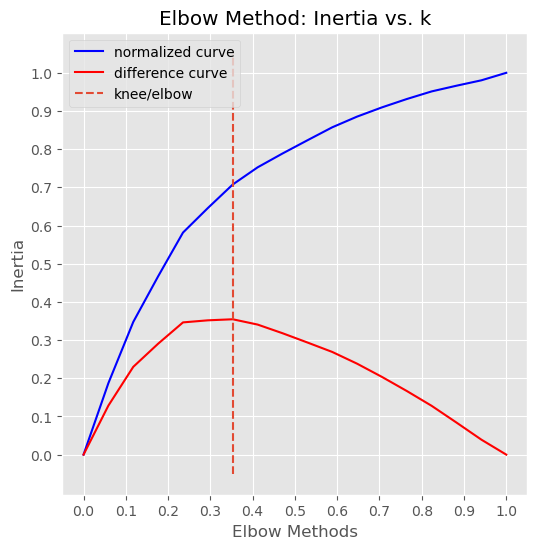

In [ ]:
#https://www.kaggle.com/code/fhabibimoghaddam/customer-segmentation-k-means-clustering-pca
KNEE = KneeLocator(range(2,20), inertias, S=1.0, curve='convex', direction='decreasing')
print("Knee:", round(KNEE.knee, 3))
print("Elbow:", round(KNEE.elbow, 3))

#charting the normalized data
plt.style.use('ggplot')
KNEE.plot_knee_normalized() 
plt.ylabel("Inertia")
plt.xlabel("Elbow Methods")
plt.title("Elbow Method: Inertia vs. k")

Knee: 8
Elbow: 8


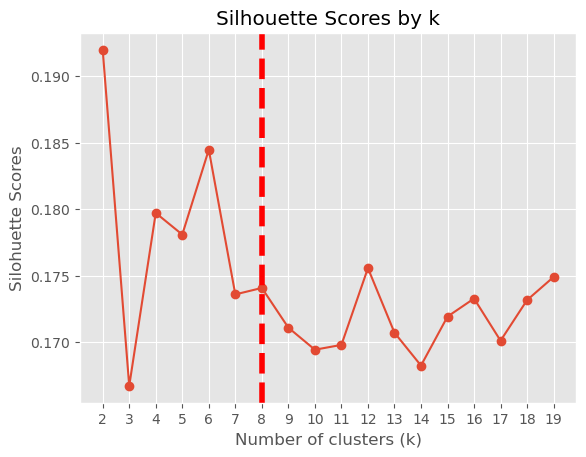

In [32]:
print("Knee:", round(KNEE.knee, 3))
print("Elbow:", round(KNEE.elbow, 3))

#charting the silohuette scores
plt.style.use('ggplot')
plt.plot(range(2,20), avg_silhouette, marker="o")
plt.xticks(range(2,20))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silohuette Scores")
plt.title("Silhouette Scores by k")
#axvline = ax vertical line
plt.axvline(x=KNEE.elbow, color="red", label="axvline - full height", linewidth=4, linestyle="--")
plt.show()

In [33]:
#clusters from scaled piepline data
centroids = pipeline.named_steps['kmeans'].cluster_centers_
print("Centroids:")
print(centroids)
#labels from fitted k-means pipline
labels = pipeline.named_steps['kmeans'].labels_
print("Labels")
print(labels)

Centroids:
[[-0.21420994  0.60643291 -0.24044221 -0.68753249  1.00191288  0.25955005]
 [-0.13510384 -0.11389542  2.26821974  0.04100071 -0.20573935 -0.20930501]
 [-0.20766034  0.49384597 -0.27702779 -0.66251123 -0.94522029  0.1966271 ]
 [-0.18849533  1.17254368 -0.00791828  0.19678407 -0.01227921  2.00518102]
 [-0.24669569 -1.03493775 -0.25020844  0.04919537 -0.95586524 -0.84231295]
 [-0.23015422 -0.98361708 -0.17969971 -0.03566678  0.96742285 -0.81647027]
 [-0.21687245  0.59094029 -0.24351163  1.27641573  0.02738769  0.13209675]
 [ 2.56394694  0.01105501 -0.11386001  0.03428654  0.13997571  0.02761663]]
Labels
[2 2 4 ... 0 0 7]


In [ ]:
#Cluster profile showing the means of clusters 1-5
cent_orig = pipeline.named_steps['standardscaler'].inverse_transform(centroids)
centers_df = pd.DataFrame(cent_orig, columns=Xw.columns).round(2)
print(centers_df)


   Children    Age     Income  DocVisits  TotalCharge  AdditionalCharges
0      1.64  66.32   33630.07       4.30      7485.20           14570.27
1      1.81  51.48  104227.04       5.06      4849.07           11545.96
2      1.66  64.00   32600.51       4.32      3234.89           14164.39
3      1.70  77.97   40173.60       5.23      5271.36           25830.29
4      1.57  32.51   33355.24       5.07      3211.65            7462.81
5      1.61  33.57   35339.44       4.98      7409.91            7629.50
6      1.64  66.00   33543.70       6.36      5357.95           13748.14
7      7.66  54.05   37192.26       5.05      5603.71           13074.20


In [35]:
pca = PCA(n_components=2)
modelPCA = pca.fit_transform(Xw_scaled)
centroidsPCA = pca.transform(centroids)
var = pca.explained_variance_ratio_
print("Shape of PCA model")
print(modelPCA.shape)
print("Explained Variance ratio\n", var)

Shape of PCA model
(5018, 2)
Explained Variance ratio
 [0.28494351 0.1727798 ]


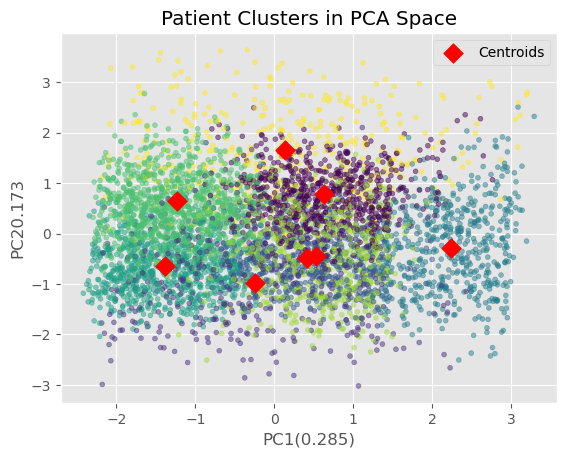

In [36]:
plt.scatter(modelPCA[:,0],modelPCA[:,1], c=labels, cmap='viridis', s=12, alpha=0.5)
plt.scatter(centroidsPCA[:,0], centroidsPCA[:,1], c='red', marker='D', s=100, label='Centroids')
plt.xlabel(f'PC1({round(var[0], 3)})')
plt.ylabel(f'PC2{round(var[1], 3)}')
plt.title('Patient Clusters in PCA Space')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
kmeans_set = {"init": "random", "n_init": 18, "max_iter":20, "random_state": 123}
Inertia = []
silhouette_coef = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(modelPCA)

    score = silhouette_score(modelPCA, kmeans.labels_)
    silhouette_coef.append(score)

    Inertia.append(kmeans.inertia_)


Knee: 5
Elbow: 5


Text(0.5, 0, 'Elbow Methods')

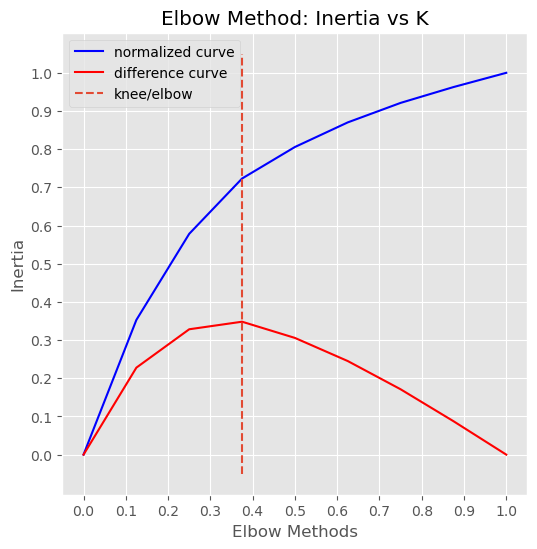

In [43]:
KNEE = KneeLocator(range(2,11), Inertia, S=1.0, curve='convex', direction='decreasing')
print("Knee:", round(KNEE.knee, 3))
print("Elbow:", round(KNEE.elbow, 3))

#charting the normalized data
plt.style.use('ggplot')
KNEE.plot_knee_normalized() 
plt.title("Elbow Method: Inertia vs K")
plt.ylabel("Inertia")
plt.xlabel("Elbow Methods")

Knee: 4
Elbow: 4


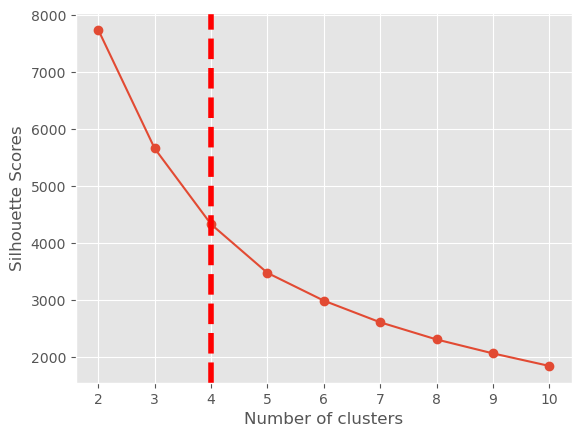

In [42]:
KNEE = KneeLocator(range(2,11), silhouette_coef, S=1.0, curve='convex', direction='decreasing')
print("Knee:", round(KNEE.knee, 3))
print("Elbow:", round(KNEE.elbow, 3))

#charting the normalized data
plt.style.use('ggplot')
plt.plot(range(2,11), Inertia, marker="o")
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Scores")
#axvline = ax vertical line
plt.axvline(x=KNEE.elbow, color="red", label="axvline - full height", linewidth=4, linestyle="--")
plt.show()